# Nursery Scenario

Number of Omega-automaton states (including the trap state): 3


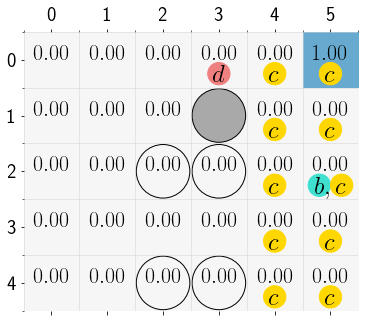

In [1]:
%matplotlib inline
from csrl.mdp import GridMDP
from csrl.oa import OmegaAutomaton
from csrl import ControlSynthesis
import numpy as np 

# LTL Specification
ltl = 'GFb & FGc & (d | !d)'

# Translate the LTL formula to an LDBA
oa = OmegaAutomaton(ltl)
print('Number of Omega-automaton states (including the trap state):',oa.shape[1])
display(oa)

# MDP Description
shape = (5,6)
# E: Empty, T: Trap, B: Obstacle
structure = np.array([
['E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'E',  'B',  'E',  'E'],
['E',  'E',  'T',  'T',  'E',  'E'],
['E',  'E',  'E',  'E',  'E',  'E'],
['E',  'E',  'T',  'T',  'E',  'E']
])

# Labels of the states
label = np.array([
[(),       (),       (),       ('d',),   ('c',),    ('c',)],
[(),       (),       (),       (),       ('c',),    ('c',)],
[(),       (),       (),       (),       ('c',),    ('b','c')],
[(),       (),       (),       (),       ('c',),    ('c',)],
[(),       (),       (),       (),       ('c',),    ('c',)]
],dtype=np.object)
# Colors of the labels
lcmap={
    'b':'turquoise',
    'c':'gold',
    'd':'lightcoral'
}
reward = np.zeros(shape)
reward[0,5]=1
grid_mdp = GridMDP(shape=shape,structure=structure,label=label,reward=reward,lcmap=lcmap,figsize=6,lexicographic=True)  # Use figsize=4 for smaller figures
grid_mdp.plot()


# Construct the product MDP
csrl = ControlSynthesis(grid_mdp,oa,discountB=0.9)

In [3]:
Q_psi,Q_phi,Q=csrl.q_learning(start=(0,0),T=2**10,K=2**17)

In [6]:
from itertools import product
tau=0.05

value_psi=np.max(Q_psi,axis=4)
Q_phi_ = np.copy(Q_phi)
for state in product(range(Q.shape[0]),range(Q.shape[1]),range(Q.shape[2]),range(Q.shape[3])):
    for action in range(Q.shape[4]):
        if Q_psi[state][action] < value_psi[state]-tau:
            Q_phi_[state][action] = -1
    
value_phi=np.max(Q_phi_,axis=4) 
Q_ = np.copy(Q)
for state in product(range(Q.shape[0]),range(Q.shape[1]),range(Q.shape[2]),range(Q.shape[3])):
    for action in range(Q.shape[4]):
        if Q_phi_[state][action] < value_phi[state]-tau:
            Q_[state][action] = -1
            
value=np.max(Q_,axis=4)
policy=np.argmax(Q_,axis=4)
# csrl.plot(value,policy,save='lexicographic_policy.pdf')
csrl.plot(value,policy)

interactive(children=(IntSlider(value=0, description='i', max=2), IntSlider(value=0, description='q', max=2), …

In [50]:
policy_ = policy[0,1]

K=2**14
T=2**10

R = 0
state=(0,5)
for k in range(K):
    for t in range(T):
        if state==(0,5):
            R += 0.99**t
        states, probs = grid_mdp.transition_probs[state][policy_[state]]
        state = states[np.random.choice(len(states),p=probs)]
R = R/K
print(R)

87.84326104311369


In [51]:
R = 0
state=(0,5)
for k in range(K):
    for t in range(T):
        if state==(0,5):
            R += 0.99**t
        if state not in [(0,4),(2,4),(3,4),(4,4)] and np.random.random() < 0.05:
            a = np.random.randint(4)
        else:
            a = policy_[state]
        states, probs = grid_mdp.transition_probs[state][a]
        state = states[np.random.choice(len(states),p=probs)]
R = R/K
print(R)

85.08266413330061


In [52]:
state=(0,5)
T=2**24
count=0
for t in range(T):
    if state==(2,5):
        count += 1
    if state not in [(0,4),(2,4),(3,4),(4,4)] and np.random.random() < 0.05:
        a = np.random.randint(4)
    else:
        a = policy_[state]
    states, probs = grid_mdp.transition_probs[state][a]
    state = states[np.random.choice(len(states),p=probs)]
f = count/T
print(1/f)

0.0018634796142578125
